Accuracy: 0.625


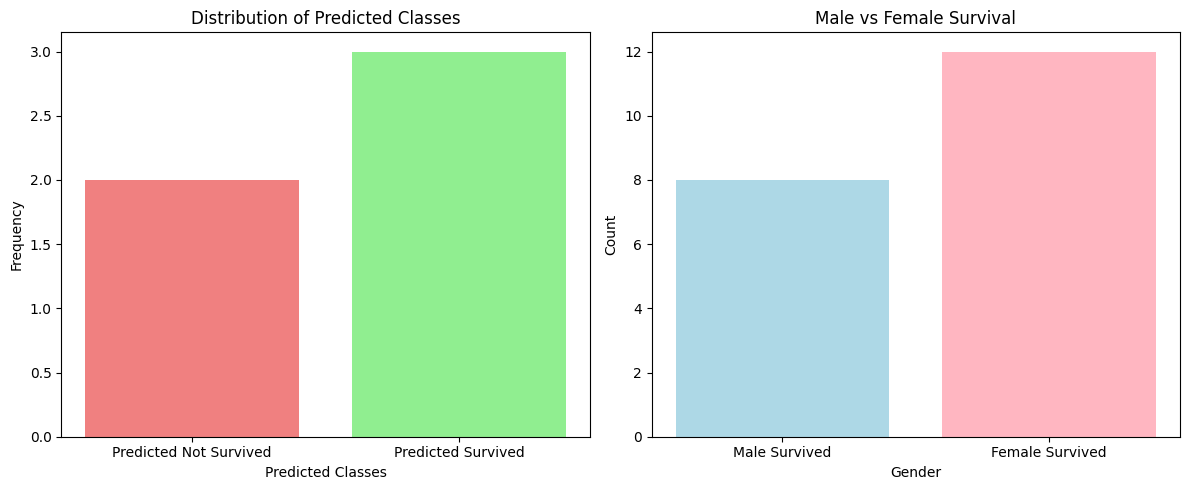

In [4]:
#Import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Processing of various data and displaying results
data = pd.read_csv('sink_data.csv')
data = pd.get_dummies(data, columns=['Socioeconomic_Status', 'Gender'], drop_first=True)
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.decision_function(X_test)
accuracy = accuracy_score(y_test, np.round(y_pred))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
predicted_classes = np.round(y_pred)
plt.bar(['Predicted Not Survived', 'Predicted Survived'], [np.sum(predicted_classes == 0), np.sum(predicted_classes == 1)], color=['lightcoral','lightgreen'])
plt.xlabel('Predicted Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Classes')
plt.subplot(1, 2, 2)
male_survived = data[data['Gender_male'] == 1]['Survived']
female_survived = data[data['Gender_male'] == 0]['Survived']
plt.bar(['Male Survived', 'Female Survived'], [male_survived.sum(), female_survived.sum()], color=['lightblue', 'lightpink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male vs Female Survival')
plt.tight_layout()
print(f'Accuracy: {accuracy}')